In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from utils.plotter import plot_examples
import os, glob

### Load the dataset and check head, total examples

In [182]:
IMG_DIR = '../data/classification-assignment/images/'
CSV_FILE = '../data/classification-assignment/attributes.csv'

In [183]:
# load the csv file
df = pd.read_csv(CSV_FILE)

# total number of examples
print(f'Total no of files: {nexamples}')
nexamples = df.shape[0]
df.head()

Total no of files: 1797


,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6.0,1.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0


### Check whether each image id has image in the IMG_DIR

In [184]:
# check rows which has no image in dataset and drop them
drop_indices = []
count = 0
for idx in range(nexamples):
    if not os.path.exists(f'{IMG_DIR}{df.filename[idx]}'):
        #print(f'idx: {idx} {df.filename[idx]} not found!')
        drop_indices.append(idx)
df.drop(df.index[drop_indices], inplace=True)

# reset_index
df.reset_index(drop=True, inplace=True)

#print total examples
nexamples = df.shape[0]
print(f'Total no of usuable examples: {nexamples}')

df.head()

Total no of usuable examples: 1797


,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
3,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
4,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,NaN


In [185]:
# Check total number of images in IMG_dir and indices in df
img_list = [os.path.basename(i) for i in glob.glob(f'{IMG_DIR}*.jpg')]
print(f'Total number of jpeg files in {IMG_DIR}: {len(img_list)}')
print(f'Total number of rows in df: {nexamples}')

Total number of jpeg files in ../data/classification-assignment/images/: 1782
Total number of rows in df: 1797


In [186]:
# unique image names in df
print(f'unique filenames in df: {df.filename.unique().shape[0]}')


unique filenames in df: 1782


#### Therefore, it implies that we have same image ids that refer to same image in the IMG_DIR

### Plot some images with attributes

565 ../data/classification-assignment/images/11504936290961-Roadster-Men-Charcoal-Solid-Henley-Neck-T-shirt-6371504936290814-4.jpg
510 ../data/classification-assignment/images/14f96ecd-4eee-440b-873a-dec79746e54c1532336928475-Wear-Your-Mind-Black-Cotton-T-shirt-For-Men-8901532336928391-5.jpg
337 ../data/classification-assignment/images/11489576295936-SPYKAR-Men-Tshirts-6701489576295732-2.jpg
826 ../data/classification-assignment/images/80006128-23e8-4571-bde5-0973c7b7b71b1536305822881-OVS-Men-Tshirts-2001536305822666-5.jpg
249 ../data/classification-assignment/images/11514464912230-Difference-of-Opinion-Men-Black--White-Striped-T-shirt-4331514464912058-2.jpg
1740 ../data/classification-assignment/images/11521190715609-Nautica-Men-Red-Printed-Polo-Collar-T-shirt-3031521190715490-4.jpg
143 ../data/classification-assignment/images/0cb549e0-7e6c-41f6-8954-8b349baa96081531820374476-Nike-Air-Men-Blue--Black-Striped-Sports-Tshirts-3471531820374320-3.jpg
1572 ../data/classification-assignment/

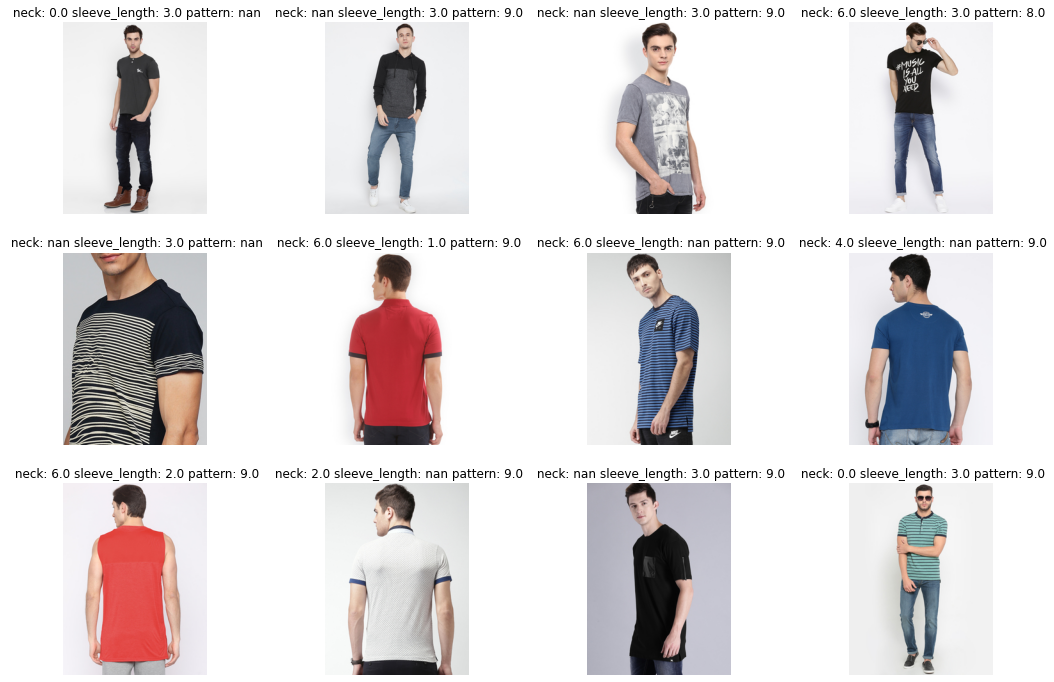

In [187]:
# plot some images with attributes
nimgs = 12
ncols = 4
idx = random.sample(range(0,nexamples), nimgs)

nrows = nimgs//ncols  
# define figure
fig_, axes=plt.subplots(nrows, ncols, figsize=(18, 12))
axes = axes.ravel()
j = 0

for i in idx:
    #print(f'Plot image idx: {i}')
    img_path = IMG_DIR + df.filename[i]
    print(i, img_path)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #print(image.shape)
    axes[j].imshow(image)
    title = ''
    for col in col_names:
        title = title + f' {col}: {df[col][i]}'
    axes[j].set_title(title, fontsize=12)
    axes[j].axis('off')
    j +=1
#plt.subplots_adjust(hspace=0.2, vspace=0.4)

### Get all the unique values for each attribute and some statistics

In [188]:
# Unique values
for col in col_names:
    val_unique = df[col].unique()
    print(f'{col}\nTotal: {len(df[col].unique())}\nUnique: {df[col].unique()}\n')

neck
Total: 8
Unique: [ 6.  5. nan  1.  4.  0.  2.  3.]

sleeve_length
Total: 5
Unique: [nan  3.  0.  1.  2.]

pattern
Total: 11
Unique: [ 4.  9. nan  8.  3.  6.  7.  1.  2.  0.  5.]



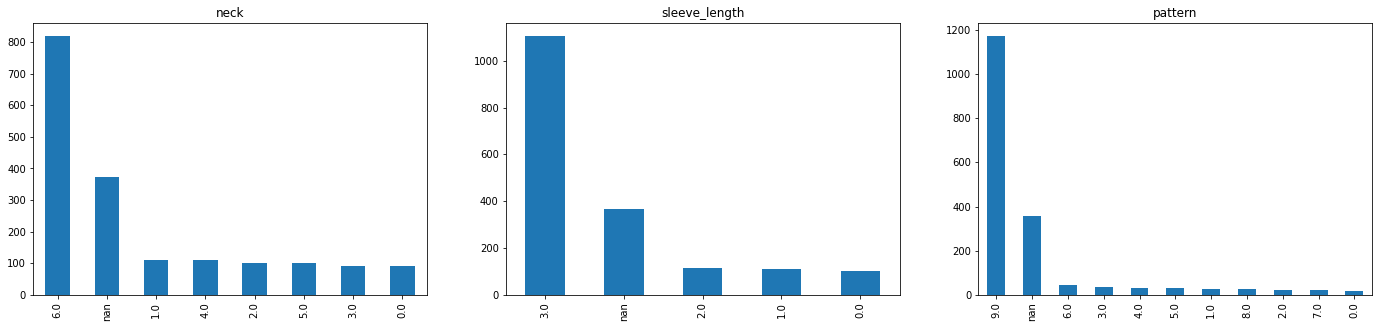

In [189]:
# define figure
fig_, axes=plt.subplots(1, len(col_names), figsize=(24, 5))
axes = axes.ravel()
i=0
for col in col_names:
    df[col].value_counts(dropna=False).plot(ax=axes[i],kind='bar', title=col)
    i+=1
plt.show()

In [190]:
# find rows with all columns as nan
# create a copy
df_copy = df[col_names]
idx_nans = df_copy.index[df_copy.isnull().all(1)]
print(f'Total number of all nans rows: {len(idx_nans)}')
nans = df.iloc[idx_nans]
#nans

Total number of all nans rows: 23


### Assign a new integer value to all Nan's in each column/attribute (the l) and convert all classes to integer type
#### last class in each label/attribute corresponds to NaN value 

In [191]:
# Fill nan values
for col in col_names:
    val_unique = df[col].unique()
    nan_value = len(df[col].unique())-1
    #print(f'{col}\nTotal: {len(df[col].unique())}\nUnique: {df[col].unique()}\n')
    df[col] = df[col].fillna(nan_value)
    df[col] = df[col].astype(int)
    print(f'{col}\nTotal: {len(df[col].unique())}\nUnique: {df[col].unique()}\n')
    

neck
Total: 8
Unique: [6 5 8 1 4 0 2 3]

sleeve_length
Total: 5
Unique: [5 3 0 1 2]

pattern
Total: 11
Unique: [ 4  9 11  8  3  6  7  1  2  0  5]



In [180]:
## Output the processed csv file
outfile = '../data/classification-assignment/attributes_processed.csv'
df.to_csv(outfile, index=False)